# AAL Sales Analysis – 4th Quarter 2020
# Author: Pavan Chinta
# Description: Data wrangling, analysis, visualization, and recommendations

In [3]:
! pip install seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----------------------- ---------------- 4.7/8.1 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 20.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 21.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 19.3 MB/s eta 0:00:00


In [5]:
! pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------- ----------------------- 4.5/10.7 MB 22.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 22.1 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 19.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ---- ----------------------------------- 4.7/41.0 MB 23.7 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/41.0 MB 22.5 MB/s eta 0:00:02
   -------------- ------------------------- 14.4/41.0 MB 22.1 MB/s eta 0:00:02
   ------------------ --------------------- 19.1/41.0 MB 21.9 MB/s eta 0:00:01
   ---------------------- ----------------- 23.1/41.0 MB 21.5 MB/s eta 0:00:01
   --------------------------- ------------ 27.8/41.0 MB 21.5 MB/s eta 0:00:01
   ------------------------------- -------- 32.5/41.0 MB 21.5 MB/s eta 0:00:01
   ----------------------------------- ---- 36.7/41.0 MB 21.6 MB/s eta 0:0

In [25]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [26]:
# Step 2: Load Dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [27]:
# Step 3: Data Wrangling
## Check nulls and data types
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [28]:
## Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

In [29]:
## Normalize Sales and Unit columns
scaler = MinMaxScaler()
df[['Unit_norm', 'Sales_norm']] = scaler.fit_transform(df[['Unit', 'Sales']])
df.head()

,Date,Time,State,Group,Unit,Sales,Unit_norm,Sales_norm
0,2020-10-01,Morning,WA,Kids,8,20000,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,8,20000,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,4,10000,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,15,37500,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,3,7500,0.015873,0.015873


In [9]:
# Step 4: Descriptive Statistics
print("Descriptive Stats:\n", df[['Sales', 'Unit']].describe())
print("Mean Sales:", df['Sales'].mean())
print("Median Sales:", df['Sales'].median())
print("Mode Sales:", df['Sales'].mode()[0])
print("Std Dev Sales:", df['Sales'].std())


Descriptive Stats:
                Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000
Mean Sales: 45013.5582010582
Median Sales: 35000.0
Mode Sales: 22500
Std Dev Sales: 32253.506943966073


In [30]:
# Step 5: Group Analysis
## Highest/Lowest Sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print("State-wise Sales:\n", state_sales)

State-wise Sales:
 State
VIC    105565000
NSW     74970000
SA      58857500
QLD     33417500
TAS     22760000
NT      22580000
WA      22152500
Name: Sales, dtype: int64


In [32]:
## Group-wise (Kids, Men, Women, Seniors)
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("Group-wise Sales:\n", group_sales)

Group-wise Sales:
 Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64


In [33]:
# Step 6: Weekly/Monthly/Quarterly Reports
df.set_index('Date', inplace=True)
weekly_sales = df.resample('W').sum()
monthly_sales = df.resample('M').sum()
quarterly_sales = df.resample('Q').sum()

C:\Users\chint\AppData\Local\Temp\ipykernel_33524\768755841.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()
C:\Users\chint\AppData\Local\Temp\ipykernel_33524\768755841.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = df.resample('Q').sum()


C:\Users\chint\AppData\Local\Temp\ipykernel_33524\240127598.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')


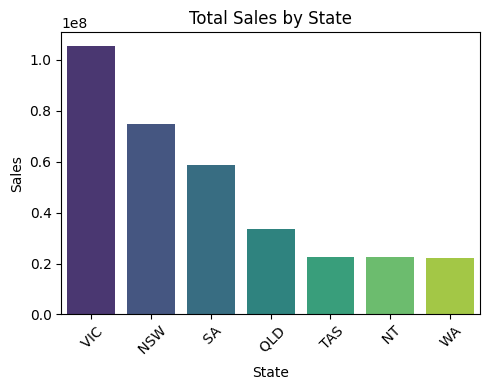

In [34]:
# Step 7: Visualizations

## Bar plot: State-wise Sales
plt.figure(figsize=(5,4))
sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
plt.title('Total Sales by State')
plt.ylabel('Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

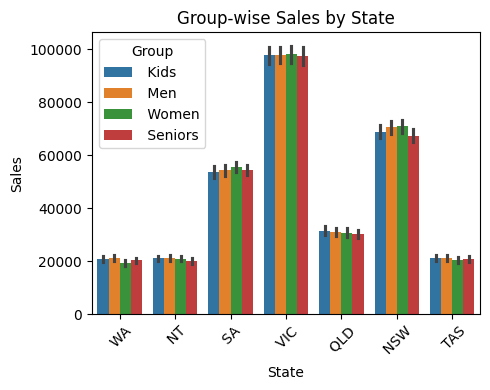

In [35]:
## Group-wise Sales Across States
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='State', y='Sales', hue='Group')
plt.title("Group-wise Sales by State")
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

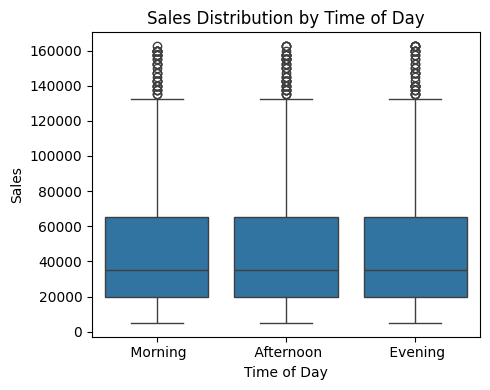

In [36]:
## Time of Day Analysis
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x='Time', y='Sales')
plt.title('Sales Distribution by Time of Day')
plt.ylabel('Sales')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

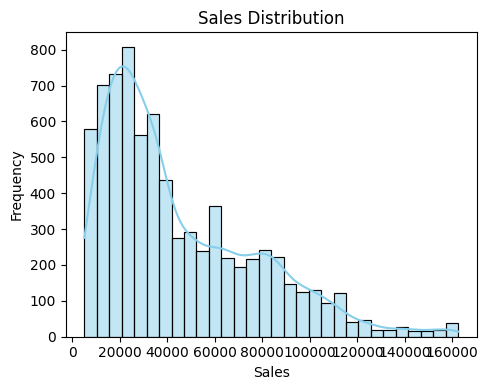

In [37]:
## Distribution Plot of Sales
plt.figure(figsize=(5,4))
sns.histplot(df['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

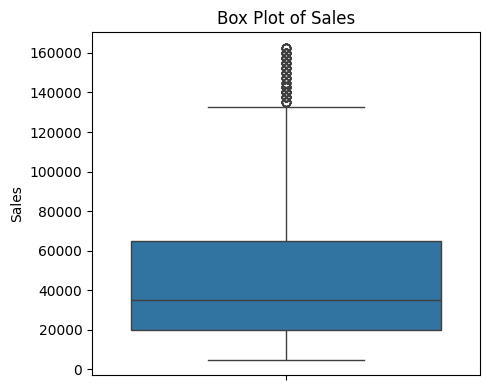

In [38]:
## Box Plot of Sales
plt.figure(figsize=(5,4))
sns.boxplot(data=df['Sales'])
plt.title('Box Plot of Sales')
plt.tight_layout()
plt.show()

In [40]:
# Step 8: Final Insights & Recommendations

print(" Top Performing States:")
print(state_sales.head(3))

print("\n States Needing Improvement:")
print(state_sales.tail(3))

print("\n Group Performance Overview:")
print(group_sales)

print("\n Recommendation:")
print("""Invest more in top 3 states with high revenue.
Launch marketing or discount programs in the 3 lowest-performing states.
Peak sales happen in the Morning and Evening. Plan offers accordingly.
Kids and Women segments show strong revenue; consider launching combo or seasonal offer""")

 Top Performing States:
State
VIC    105565000
NSW     74970000
SA      58857500
Name: Sales, dtype: int64

 States Needing Improvement:
State
TAS    22760000
NT     22580000
WA     22152500
Name: Sales, dtype: int64

 Group Performance Overview:
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64

 Recommendation:
Invest more in top 3 states with high revenue.
Launch marketing or discount programs in the 3 lowest-performing states.
Peak sales happen in the Morning and Evening. Plan offers accordingly.
Kids and Women segments show strong revenue; consider launching combo or seasonal offer
